In [61]:

%pip install matplotlib
%pip install seaborn


import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams["font.family"] = "Arial Unicode MS"



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [161]:
# Uvoz knjižnice
import pandas as pd



# Branje CSV datoteke
knjige = pd.read_csv('knjige.csv', encoding='utf-8')

# Nastavimo, da se pri izpisu prikaže največ 20 vrstic
pd.options.display.max_rows = 20

# Pretvorba stolpcev v številčne vrednosti
knjige["ocena"] = pd.to_numeric(knjige["ocena"], errors="coerce").fillna(0)
knjige["stevilo_ocen"] = pd.to_numeric(knjige["stevilo_ocen"], errors="coerce").fillna(0).astype(int)
knjige["want_to_read"] = pd.to_numeric(knjige["want_to_read"], errors="coerce").fillna(0).astype(int)
knjige["prva_izdaja"] = pd.to_numeric(knjige["prva_izdaja"], errors="coerce").fillna(0).astype(int)
knjige["stevilo_izdaj"] = pd.to_numeric(knjige["stevilo_izdaj"], errors="coerce").fillna(0).astype(int)

# Izpišemo tabelo prvih 20 knjig, da vidimo, kako se nam izpišejo podatki
# Display top 20, rounding ocena for display
knjige.head(20)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
0,W.B. Yeats,William Butler Yeats,4.20,15,166,1895,135
1,A B C Murders,Agatha Christie,4.11,54,973,1936,132
2,The Annotated Charlotte's Web,E. B. White,4.03,399,0,1952,149
3,The Souls Of Black Folk: Essays And Sketches,W. E. B. Du Bois,4.00,8,225,1903,412
4,Finnegans wake: a facsimile of Buffalo noteboo...,James Joyce,3.58,12,117,1928,128
5,Art of poetry,"Aristotle,Leon Golden, andO. B. Hardison",3.86,7,251,1536,251
6,The B.F.G.,Roald Dahl,4.18,130,0,1980,136
7,The Elements of Style,"William Strunk, Jr.,E. B. White,William Strunk...",3.62,13,331,1920,273
8,"The Norton Anthology of English Literature, Vo...","M. H. Abrams,M. Abrams,M. H. Adams,Stephen Gre...",3.67,3,149,1962,244
9,Hunger,"Knut Hamsun,George Egerton,M. B. Ruud,Robert B...",3.75,12,78,1890,154


In [63]:

# Število vseh knjig
st_knjig = len(knjige)
print(st_knjig)


12000


In [64]:

# Knjige z vec kot 10 ocenami
# To nam bo pomagalo pri nadaljni analizi, kjer bomo želeli imeti le knjige
# z dovolj veliko ocenami, da bodo naše ugotovitve bolj točne.
# Prepričati se moramo da je takih knjig dolvolj. 
knjige_10 = knjige[knjige["stevilo_ocen"] > 10]
print(len(knjige_10))


1034


In [117]:

# Povprecna ocena
povprecna_ocena = knjige_10["ocena"].mean()
print(povprecna_ocena)


3.96390316615087


In [163]:

#Najvisja in najnizja ocena
najnizja = knjige_10.loc[knjige_10["ocena"].idxmin()]
najvisja = knjige_10.loc[knjige_10["ocena"].idxmax()]

print(najnizja)
print(najvisja)


naslov           Hannibal Rising
avtor              Thomas Harris
ocena                       2.76
stevilo_ocen               17.00
want_to_read               89.00
prva_izdaja              2006.00
stevilo_izdaj              22.00
stoletje                   21.00
vredne_branja               7.99
Name: 1447, dtype: object
naslov           Empire of Storms (B&N Exclusive Edition) (Thro...
avtor                                                Sarah J. Maas
ocena                                                         4.94
stevilo_ocen                                                 16.00
want_to_read                                                200.00
prva_izdaja                                                2016.00
stevilo_izdaj                                                24.00
stoletje                                                     21.00
vredne_branja                                                13.99
Name: 1148, dtype: object


In [67]:

# Število vseh ocen
st_vseh_ocen = knjige["stevilo_ocen"].sum()
print(st_vseh_ocen)


61687.0


In [156]:

#Povprecen "want-to-read"
povprecen_want_to_read = knjige["want_to_read"].mean().round(2)
print(povprecen_want_to_read)


33.22


In [165]:

#Knjige z najvisjo oceno
knjige_razvrscene = knjige_10.sort_values(by="ocena", ascending=False)

knjige_razvrscene.head(20)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj,stoletje,vredne_branja
1148,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.94,16.00,200.00,2016.00,24.00,21.00,13.99
570,Frog and Toad Are Friends,Arnold Lobel,4.92,12.00,218.00,1920.00,73.00,20.00,12.61
1814,"Mistborn Trilogy: The Final Empire, the Well o...",Brandon Sanderson,4.91,11.00,119.00,2001.00,10.00,21.00,12.20
1028,Junie B. Jones Is a Party Animal (Junie B. Jon...,Barbara ParkandDenise Brunkus,4.82,11.00,71.00,1979.00,9.00,20.00,11.97
1823,The Happiest Man on Earth,Eddie Jaku,4.81,16.00,204.00,2020.00,10.00,21.00,13.63
1717,The Pigeon Finds a Hot Dog!,Mo Willems,4.81,31.00,161.00,2004.00,13.00,21.00,16.66
1582,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.77,13.00,312.00,2020.00,17.00,21.00,12.59
1005,Prisoner B-3087,Alan Gratz,4.76,21.00,314.00,2013.00,2.00,21.00,14.72
1958,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.73,15.00,391.00,2019.00,6.00,21.00,13.12
2048,Fantasia: Het Vlammenravijn,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",4.73,11.00,73.00,2009.00,8.00,21.00,11.75


In [70]:

# Top 10 want-to-read knjig
top10_wtr = knjige.sort_values("want_to_read", ascending=False)
top10_wtr.head(10)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1839,the sun and her flowers,Rupi Kaur,4.071429,42.0,978.0,2017.0,9.0
961,Mistborn: the final empire,Brandon Sanderson,4.431818,132.0,976.0,2001.0,41.0
665,Freakonomics: Un economista politicamente inco...,"Steven D. Levitt,Stephen J. Dubner, andAndrea ...",3.872727,165.0,975.0,2005.0,63.0
1,A B C Murders,Agatha Christie,4.111111,54.0,973.0,1936.0,132.0
310,Dr. Jekyll and Mr. Hyde,Robert Louis Stevenson,3.910569,123.0,972.0,1875.0,359.0
265,The Count of Monte Cristo,Alexandre Dumas,4.312500,176.0,966.0,1830.0,732.0
70,El juego de Ender,Orson Scott Card,4.353403,382.0,960.0,1985.0,104.0
753,Because of Winn-Dixie,Kate DiCamillo,4.206522,92.0,952.0,2000.0,55.0
852,Gone Girl,Gillian Flynn,3.636364,55.0,934.0,2011.0,48.0
280,Adventures of Huckleberry Finn,Mark Twain,3.816425,207.0,930.0,1876.0,2552.0


In [71]:

# Število knjig na avtorja
st_knjig_na_avtorja = knjige["avtor"].value_counts().head(10)
print(st_knjig_na_avtorja)


avtor
United States. Congress. House                 819
United States. Congress. House. Committe...    500
Unknown author                                 248
Betty Neels                                    110
Agatha Christie                                 99
United States. Congress. Senate. Committ...     62
Mildred Augustine Wirt Benson                   60
William Shakespeare                             52
Barbara Park                                    47
James Patterson                                 45
Name: count, dtype: int64


In [72]:

# Povprecna ocena na avtorja
povprecna_ocena_na_avtorja = knjige_10.groupby("avtor")["ocena"].mean().sort_values(ascending=False).head(10)
print(povprecna_ocena_na_avtorja)


avtor
Sarah J. Maas                                                 4.937500
Barbara ParkandDenise Brunkus                                 4.818182
Eddie Jaku                                                    4.812500
Lucy FoleyandVictoria Horrillo Ledesma                        4.769231
Alan Gratz                                                    4.761905
Tahereh Mafi                                                  4.733333
Elisabetta Dami,Danilo Barozzi,Julia Heim, andDavid Nel·lo    4.727272
Romney Marshall, B., and Paul Jhon Stein...                   4.666666
刘慈欣andJoel Martinsen                                          4.652174
Julie GarwoodandSusan Duerden                                 4.642857
Name: ocena, dtype: float64


In [134]:

# Število objavljenih knjih na stoletje
knjige_veljavne1 = knjige[knjige["prva_izdaja"] > 0].copy() # vzamemo le knjige, za katere imamo podatke o letu prve izaje
knjige_veljavne1["stoletje"] = (((knjige_veljavne1["prva_izdaja"] - 1) // 100) + 1).astype(int)

# Dodamo lepo oznako (npr. "20. stoletje")
knjige_veljavne1["stoletje_oznaka"] = knjige_veljavne1["stoletje"].astype(str) + ". stoletje:"
knjige_na_stoletje = knjige_veljavne1["stoletje_oznaka"].value_counts().sort_index()

print(knjige_na_stoletje)

stoletje_oznaka
12. stoletje:       2
15. stoletje:      56
16. stoletje:     117
17. stoletje:     159
18. stoletje:     411
19. stoletje:    1589
20. stoletje:    5797
21. stoletje:    3699
Name: count, dtype: int64


In [169]:

# Povprečna ocena na stoletje

# Ponovno uporabimo le knjige, za katere imamo podatek o letu izdaje, le da sedaj
# hkrati upoštevamo, da morajo imeti knjige več kot 10 ocen, zato namesto "knjige",
# uporabimo "knjige_10", kar smo definirali že na začetku.
knjige_veljavne2 = knjige_10[knjige_10["prva_izdaja"] > 0].copy() 
knjige_veljavne2["stoletje"] = (((knjige_veljavne2["prva_izdaja"] - 1) // 100) + 1).astype(int)

# Dodamo lepo oznako kot prej
knjige_veljavne2["stoletje_oznaka"] = knjige_veljavne2["stoletje"].astype(str) + ". stoletje:"

povprecna_ocena_na_stoletje = (
    knjige_veljavne2
    .groupby(["stoletje", "stoletje_oznaka"])["ocena"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values("stoletje")
    .loc[:, ["stoletje_oznaka", "ocena"]] # znebimo se oznake "stoletje", ki smo jo potrebovali za pravilen vrstni red
    .rename(columns={"stoletje_oznaka": "stoletje", "ocena" : "povprecna_ocena"})
)

print(povprecna_ocena_na_stoletje)


        stoletje  povprecna_ocena
0  12. stoletje:             3.93
1  15. stoletje:             3.91
2  16. stoletje:             3.76
3  17. stoletje:             3.76
4  18. stoletje:             3.81
5  19. stoletje:             3.90
6  20. stoletje:             3.96
7  21. stoletje:             4.04


In [75]:

# Najbolje ocenjene knjige v zadnjih 10-ih letih
novejse_knjige = knjige_10[knjige_10["prva_izdaja"] >= 2015].sort_values("ocena", ascending=False)
novejse_knjige.head(10)


,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1148,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.937500,16.0,200.0,2016.0,24.0
1823,The Happiest Man on Earth,Eddie Jaku,4.812500,16.0,204.0,2020.0,10.0
1582,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.769231,13.0,312.0,2020.0,17.0
1958,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.733333,15.0,391.0,2019.0,6.0
2065,Arcanum Unbounded: The Cosmere Collection: the...,Brandon Sanderson,4.687500,16.0,58.0,2016.0,13.0
937,Getaway (Diary of a Wimpy Kid Book 12) (Exclus...,Jeff Kinney,4.661017,59.0,819.0,2017.0,39.0
1601,Oathbringer: The Stormlight Archive Book Three,Brandon Sanderson,4.566265,83.0,198.0,2017.0,16.0
1420,Shoe Dog: A Memoir by the Creator of Nike,Phil Knight,4.533333,45.0,661.0,2016.0,23.0
1528,The Hollow Boy,Jonathan Stroud,4.500000,12.0,123.0,2015.0,19.0
3480,The Raven Tower,Ann Leckie,4.466667,15.0,37.0,2019.0,8.0


In [167]:

# Najstarejše knjige
# Ponovno uporabimo knjige, za katere imamo podano leto izdaje
knjige_po_letih = knjige_veljavne1.sort_values("prva_izdaja")
knjige_po_letih.head(10)[["naslov", "avtor", "prva_izdaja", "stoletje", "ocena"]]


,naslov,avtor,prva_izdaja,stoletje,ocena
191,The Holy Bible: containing the Old and New Tes...,Bible,1200.00,12,3.93
5346,The new psalter of the Roman breviary: text an...,Catholic Church,1200.00,12,0.00
694,"De civitate dei, libri XXII",Augustine of Hippo,1440.00,15,3.50
1512,Tully's offices: in three books,Cicero,1465.00,15,0.00
138,C. Plini Secundi naturalis historiae libri XXX...,Pliny the Elder,1469.00,15,4.33
1836,De vita Caesarum: libri VIII,SuetoniusandR. E. J. Fitzpatrick,1470.00,15,0.00
2264,Justin's history of the world from the Assyria...,"Marcus Junianus Justinus,Justin, andWaldemar H...",1470.00,15,3.50
5298,The pastoral care: King Alfred's translation o...,"Pope Gregory I,Bruno Judic, andFloribert Rommel",1470.00,15,3.00
594,Mishneh Torah leha-Rambam: hilkhot ʻavadim,Moses Maimonides,1470.00,15,4.00
3648,De finibus bonorum et malorum,Cicero,1471.00,15,4.00


In [170]:

# Število knjig po številu izdaj
st_knjig_po_st_izdaj = knjige["stevilo_izdaj"].value_counts().sort_index().astype(int)
print(st_knjig_po_st_izdaj)


stevilo_izdaj
0       4414
2        843
3        445
4        286
5        208
        ... 
2986       1
3172       1
3456       1
3546       1
4036       1
Name: count, Length: 496, dtype: int64


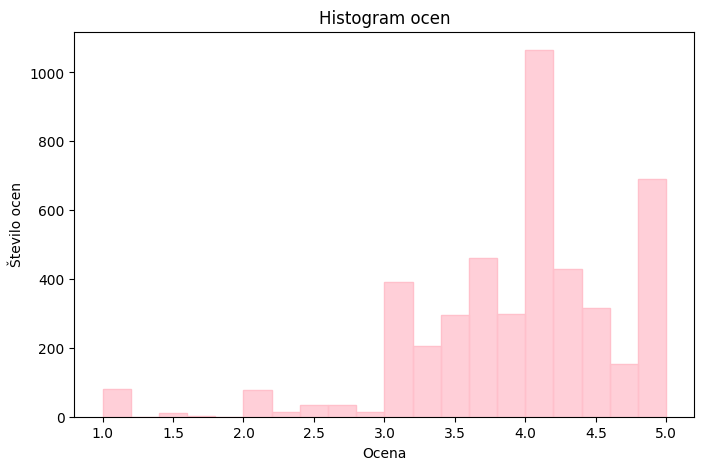

In [174]:

# Histogram ocen
ocena_poz = knjige["ocena"][knjige["ocena"] > 0] #znebimo se knjig brez podatkov o oceni

plt.figure(figsize=(8,5))
sns.histplot(ocena_poz, bins = 20, color="pink", edgecolor = "pink")
plt.title("Histogram ocen")
plt.xlabel("Ocena")
plt.ylabel("Število ocen")
plt.show()

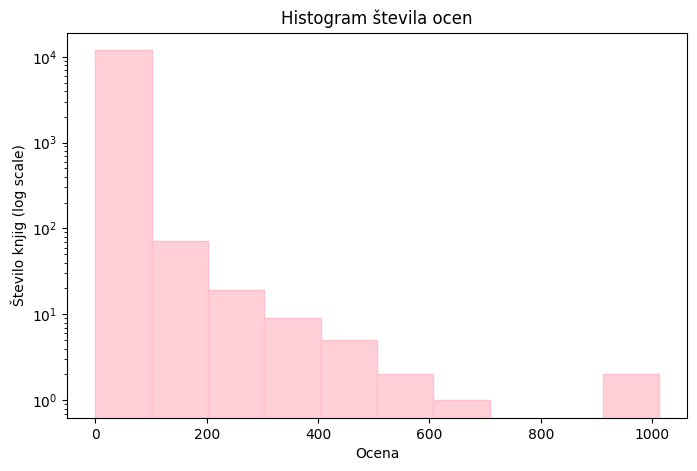

In [175]:
# Histogram števila ocen
plt.figure(figsize=(8,5))
sns.histplot(knjige["stevilo_ocen"].dropna(), bins=10, color="pink", edgecolor="pink")
plt.title("Histogram števila ocen")
plt.xlabel("Ocena")


# Pri prikazu histograma ocen, smo os y nastavlili na logritmično lestvico.
# To naredimo zato, ker je porazdelitev števila ocen dokaj nesimetrična, 
# veliko knjig ima zelo malo ocen, medtem ko ima nekaj knjig kar veliko ocen.
# Z logaritmično lestvico se majhne in velike vrednosti bolje prikažejo skupaj,
# saj logaritmiranje kompresira visoke vrednosti in razširi nizke vrednosti. 
plt.yscale("log")
plt.ylabel("Število knjig (logaritemska lestvica)")

plt.show()

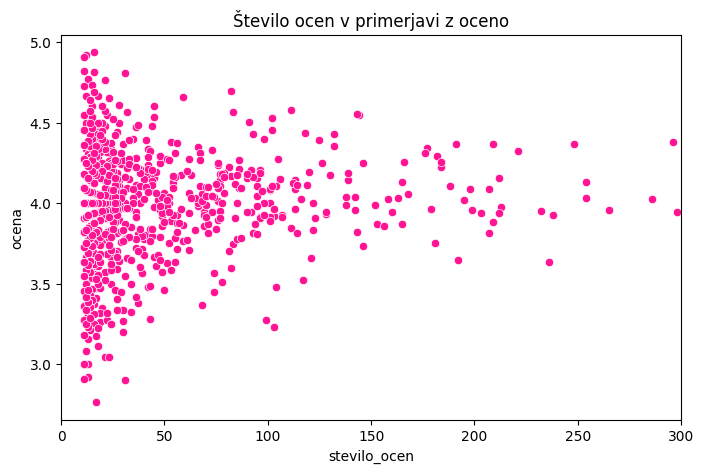

In [80]:
# Raztresen diagram: število ocen v primerjavi s povprečno oceno
plt.figure(figsize=(8,5))
sns.scatterplot(x = "stevilo_ocen", y = "ocena", data = knjige_10, color = "deeppink")
plt.title("Število ocen v primerjavi z oceno")
plt.xlim(0, 300)
plt.show()

# Opazka: iz grafa lahko opazimo, da imajo knjige z malo ocen širši razpon ocen,
# ko se število ocen povečuje, pa se interval ocen postopoma zožuje, kar pomeni,
# da se povprečne ocene ujemajo bolj dosledno in razpršenost ocen se manjša.

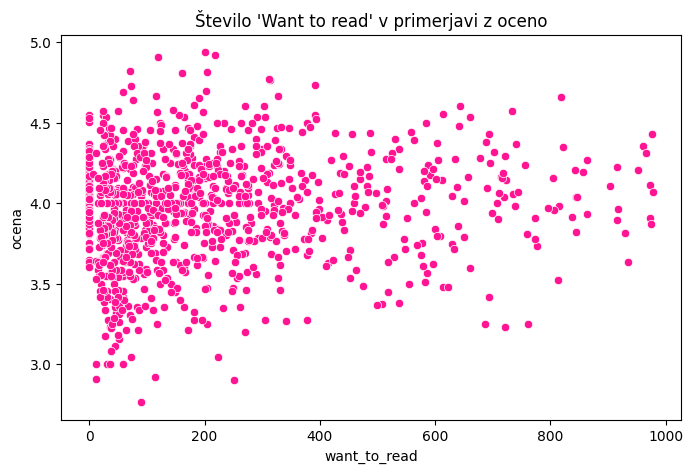

In [81]:
# Raztresen diagram: Število "Want to read" v primerjavi z oceno
plt.figure(figsize=(8,5))
sns.scatterplot(
    x = "want_to_read", 
    y = "ocena",
    data = knjige_10,
    color = "deeppink")
plt.title("Število 'Want to read' v primerjavi z oceno")
plt.show()

In [82]:
# Najbolj ocenjene knjige z več kot 10 ocenami
najbolj_ocenjene = knjige.sort_values("stevilo_ocen", ascending = False)
najbolj_ocenjene.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj,stoletje
755,De 48 wetten van de macht,Robert Greene,4.041502,1012.0,0.0,1998.0,55.0,1990.0
59,"Rich Dad, Poor Dad B Special",Robert T. KiyosakiandSharon L. Lechter,4.011248,978.0,0.0,1990.0,115.0,1990.0
465,A Game of Thrones,George R. R. Martin,4.217765,698.0,0.0,1996.0,87.0,1990.0
250,Harry Potter and the Prisoner of Azkaban,J. K. Rowling,4.275387,581.0,0.0,1999.0,261.0,1990.0
266,Animal Farm,George Orwell,4.131373,510.0,0.0,1945.0,413.0,1940.0
312,Think and Grow Rich,Napoleon HillandJonathan C. Young,4.012024,499.0,0.0,1937.0,287.0,1930.0
118,The Hunger Games,Suzanne Collins,4.102397,459.0,0.0,2008.0,131.0,2000.0
236,The Hobbit,J.R.R. Tolkien,4.281046,459.0,0.0,1937.0,460.0,1930.0
369,Harry Potter and the Chamber of Secrets,J. K. Rowling,4.204598,435.0,0.0,1998.0,275.0,1990.0
382,Brave New World,Aldous Huxley,3.955503,427.0,0.0,1932.0,678.0,1930.0


In [83]:
# Najbolje ocenjene knjige z več kot 10 ocenami
najbolje_ocenjene = knjige_10.sort_values("ocena", ascending=False)
najbolje_ocenjene.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj
1148,Empire of Storms (B&N Exclusive Edition) (Thro...,Sarah J. Maas,4.937500,16.0,200.0,2016.0,24.0
570,Frog and Toad Are Friends,Arnold Lobel,4.916666,12.0,218.0,1920.0,73.0
1814,"Mistborn Trilogy: The Final Empire, the Well o...",Brandon Sanderson,4.909091,11.0,119.0,2001.0,10.0
1028,Junie B. Jones Is a Party Animal (Junie B. Jon...,Barbara ParkandDenise Brunkus,4.818182,11.0,71.0,1979.0,9.0
1823,The Happiest Man on Earth,Eddie Jaku,4.812500,16.0,204.0,2020.0,10.0
1717,The Pigeon Finds a Hot Dog!,Mo Willems,4.806452,31.0,161.0,2004.0,13.0
1582,The Guest List: A Novel,Lucy FoleyandVictoria Horrillo Ledesma,4.769231,13.0,312.0,2020.0,17.0
1005,Prisoner B-3087,Alan Gratz,4.761905,21.0,314.0,2013.0,2.0
1958,"Defy Me: The Shatter Me Series, book 5",Tahereh Mafi,4.733333,15.0,391.0,2019.0,6.0
2048,Fantasia: Het Vlammenravijn,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",4.727272,11.0,73.0,2009.0,8.0


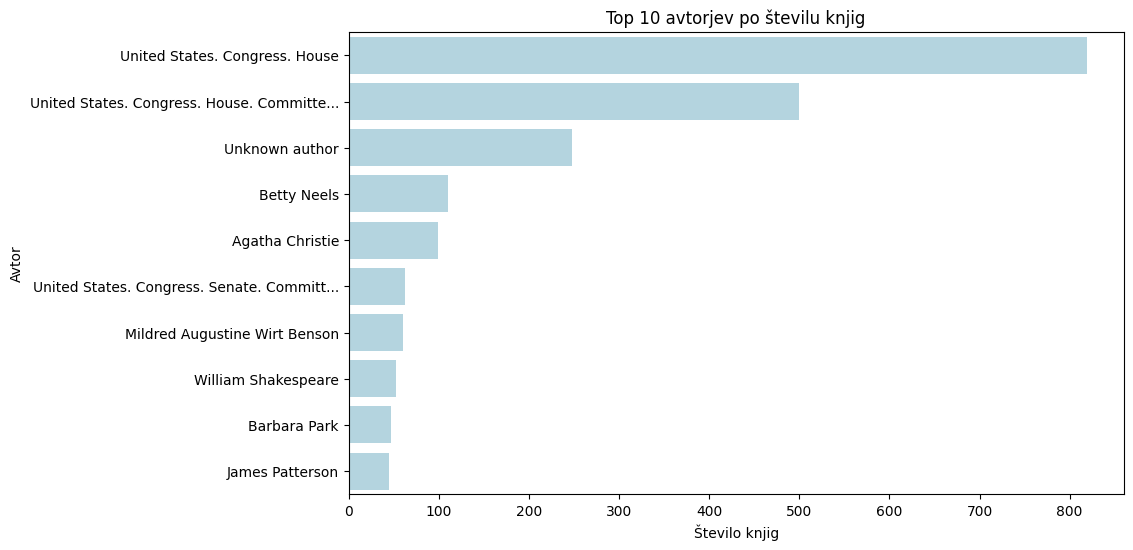

In [84]:
# Najbolj izdajani avtorji
top10_avtorjev = st_knjig_na_avtorja.head(10)
plt.figure(figsize=(10,6))
sns.barplot(
    x = top10_avtorjev.values,
    y = top10_avtorjev.index,
    color = "lightblue"
)
plt.title("Top 10 avtorjev po številu knjig")
plt.xlabel("Število knjig")
plt.ylabel("Avtor")
plt.show()

/Users/zalaplesec/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zalaplesec/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24904 (\N{CJK UNIFIED IDEOGRAPH-6148}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zalaplesec/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27427 (\N{CJK UNIFIED IDEOGRAPH-6B23}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


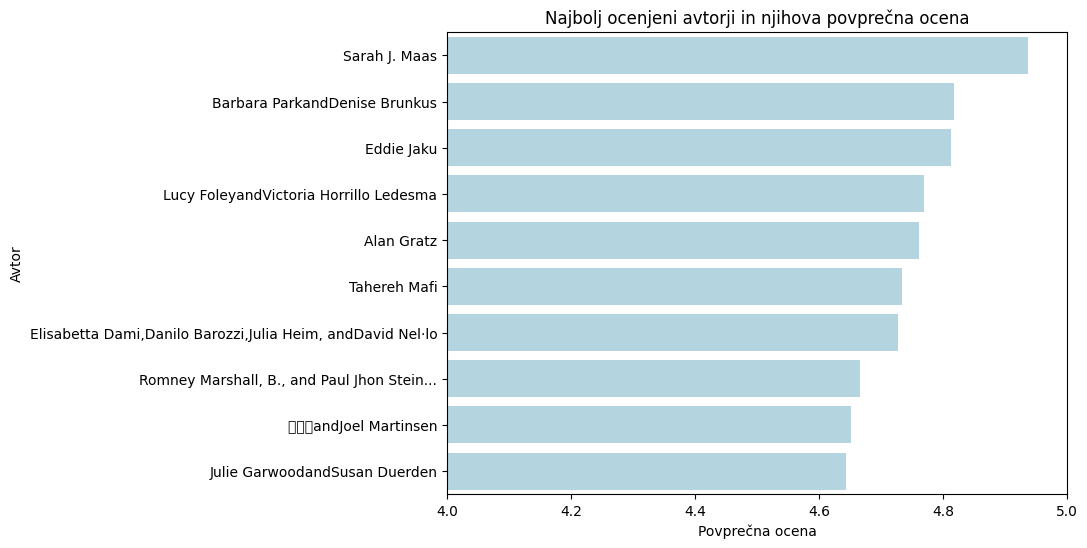

In [85]:
# Najbolje ocenjeni avtorji
top10_ocenjeni = povprecna_ocena_na_avtorja.head(10)
plt.figure(figsize=(8, 6))
sns.barplot(
    x = top10_ocenjeni.values,
    y = top10_ocenjeni.index,
    color="lightblue"
)
plt.title("Najbolj ocenjeni avtorji in njihova povprečna ocena")
plt.xlabel("Povprečna ocena")
plt.xlim(4, 5)
plt.ylabel("Avtor")
plt.show()

In [86]:
# Top 10 avtorjev na podlagi števila "Want to read"
avtorji_wtr = (
    knjige.groupby("avtor")["want_to_read"]
    .sum()
    .sort_values(ascending=False)
    )
top10_avtorji_wtr = avtorji_wtr.head(10)
top10_avtorji_wtr

avtor
Agatha Christie          11653.0
William Shakespeare       5958.0
Stephen King              5820.0
James Patterson           4156.0
Anne Rice                 3889.0
Brandon Sanderson         3800.0
Betty Neels               3800.0
Arthur Conan Doyle        3235.0
Charles Dickens           3020.0
Robert Lawrence Stine     2610.0
Name: want_to_read, dtype: float64

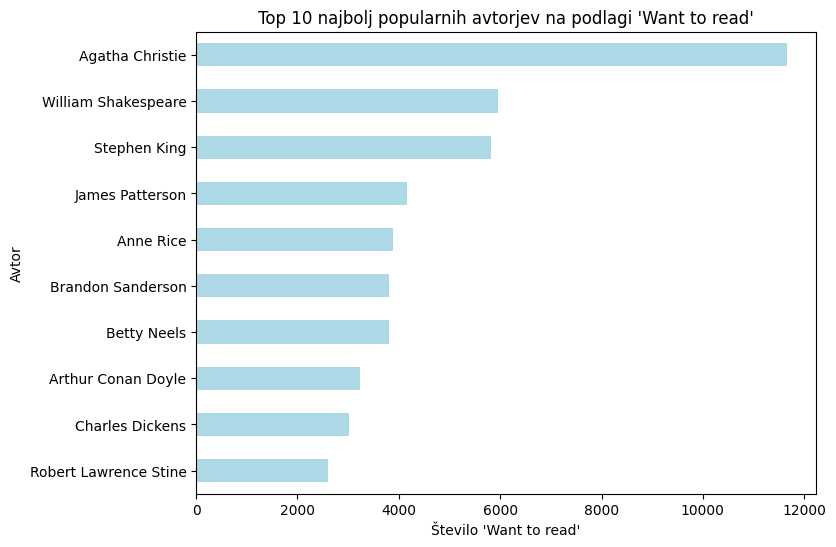

In [87]:
top10_avtorji_wtr.plot(kind = "barh", figsize=(8, 6), color = "lightblue") 
plt.title("Top 10 najbolj popularnih avtorjev na podlagi 'Want to read'") 
plt.xlabel("Število 'Want to read'") 
plt.ylabel("Avtor") 
plt.gca().invert_yaxis()
plt.show()

In [88]:
# Število prvih izdaj vsako stoletje
knjige_fil = knjige[knjige["prva_izdaja"] != 0]
knjige["stoletje"] = (knjige_fil["prva_izdaja"] // 100 + 1).astype(int)
knjige_po_stoletju = knjige["stoletje"].value_counts().sort_index()
knjige_po_stoletju


stoletje
13.0       2
15.0      52
16.0     110
17.0     161
18.0     282
19.0    1613
20.0    5719
21.0    3891
Name: count, dtype: int64

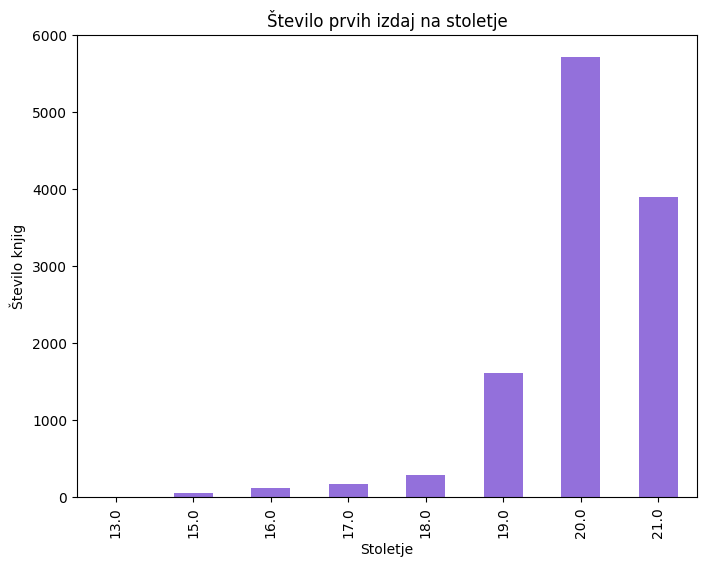

In [89]:
# Stolpični diagram prvih izdaj vsako stoletje
plt.figure(figsize=(8,6))
knjige_po_stoletju.plot(kind="bar", figsize = (8, 6), color = "mediumpurple")
plt.title("Število prvih izdaj na stoletje")
plt.xlabel("Stoletje")
plt.ylabel("Število knjig")
plt.show()

In [90]:
# Število prvih izdaj vsako desetletje (v zadnjih 100 letih)
trenutno_leto = pd.Timestamp.now().year
novejse_knjige1 = knjige[(knjige["prva_izdaja"] > trenutno_leto - 100) & (knjige["prva_izdaja"] > 0)].copy()
novejse_knjige1["desetletje"] = (novejse_knjige1["prva_izdaja"] // 10) * 10
knjige_na_desetletje = novejse_knjige1["desetletje"].value_counts().sort_index()
knjige_na_desetletje

desetletje
1920.0     144
1930.0     357
1940.0     265
1950.0     388
1960.0     550
1970.0     652
1980.0     910
1990.0    1256
2000.0    1566
2010.0    1727
2020.0     598
Name: count, dtype: int64

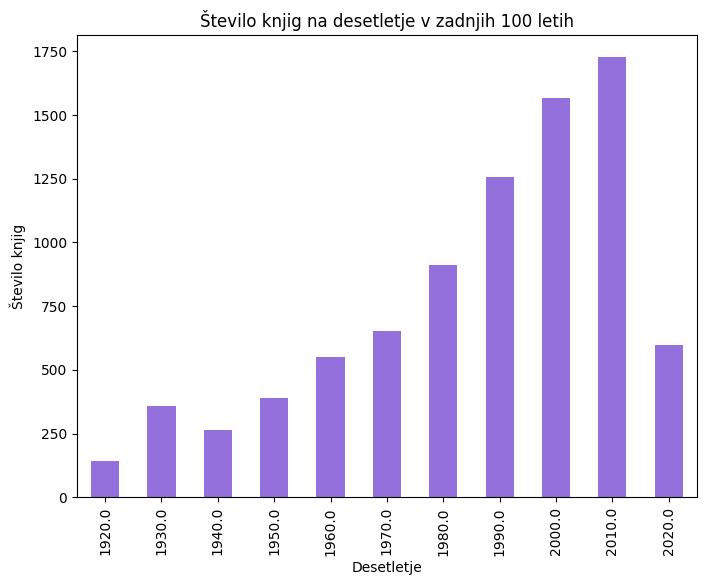

In [91]:
# Stolpični diagram prvih izdaj vsako desetletje (v zadnjem stoletju)
knjige_na_desetletje.plot(kind="bar", figsize=(8, 6), color = "mediumpurple")
plt.title("Število knjig na desetletje v zadnjih 100 letih")
plt.xlabel("Desetletje")
plt.ylabel("Število knjig")
plt.show()

In [92]:
# Povprečna ocena na stoletje
knjige_fil = knjige[knjige["prva_izdaja"] != 0]
knjige_10 = knjige_10.copy()
knjige_10["stoletje"] = (knjige_fil["prva_izdaja"] // 100 + 1).astype(int)
povp_stoletje = knjige_10.groupby("stoletje")["ocena"].mean()
povp_stoletje

stoletje
13.0    3.927536
15.0    3.881187
16.0    3.769101
17.0    3.761634
18.0    3.841699
19.0    3.893931
20.0    3.959408
21.0    4.037706
Name: ocena, dtype: float64

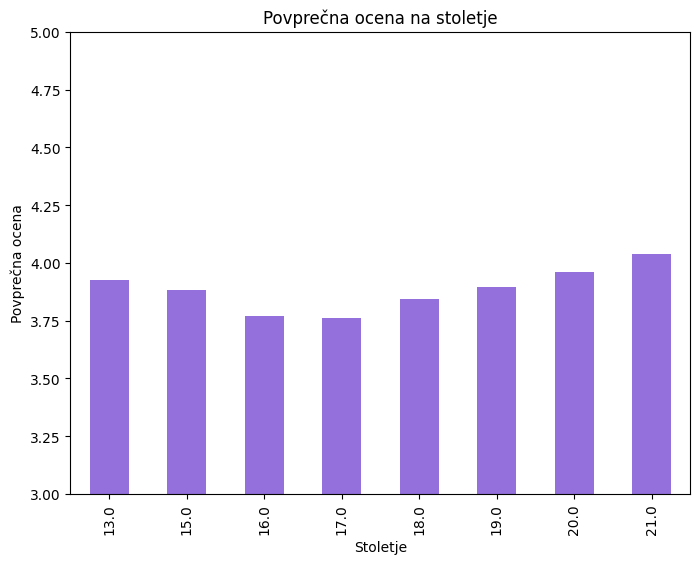

In [93]:
# Stolpični diagram povprečne ocene na stoletje (knjig z več kot 10 ocenami)
povp_stoletje.plot(kind = "bar", figsize=(8, 6), color = "mediumpurple")
plt.title("Povprečna ocena na stoletje")
plt.xlabel("Stoletje")
plt.ylabel("Povprečna ocena")
plt.ylim(3, 5)
plt.show()

In [94]:
# Povprečna ocena na desetletje (v zadnjih 100 letih, knjig z več kot 10 ocenami)
trenutno_leto = pd.Timestamp.now().year
knjige_10 = knjige_10.copy()
novejse_knjige1 = knjige_10[(knjige_10["prva_izdaja"] > trenutno_leto - 100) & (knjige_10["prva_izdaja"] > 0)].copy()
novejse_knjige1["desetletje"] = (novejse_knjige1["prva_izdaja"] // 10) * 10
knjige_na_desetletje = novejse_knjige1["desetletje"].value_counts().sort_index()

povp_desetletje = novejse_knjige1.groupby("desetletje")["ocena"].mean()
povp_desetletje

desetletje
1920.0    4.056394
1930.0    4.068206
1940.0    4.044733
1950.0    3.912482
1960.0    3.996217
1970.0    4.010851
1980.0    3.931755
1990.0    3.939433
2000.0    4.021751
2010.0    4.045342
2020.0    4.166209
Name: ocena, dtype: float64

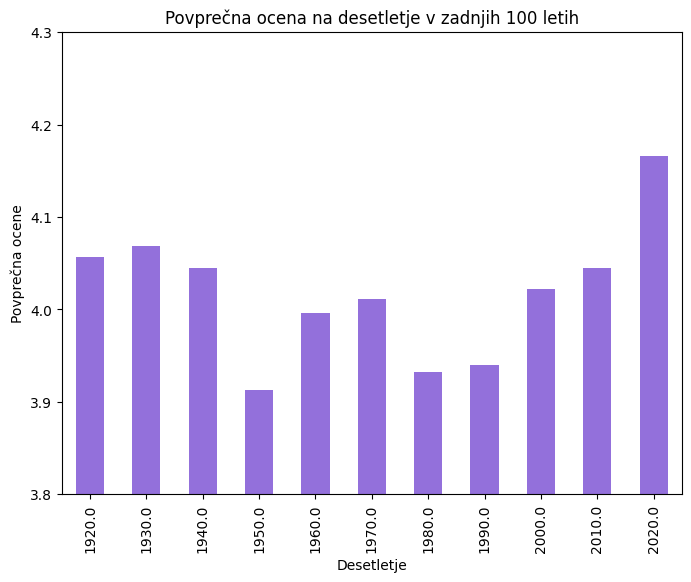

In [95]:
# Stolpični diagram povprečnih ocen na desetletje (v zadnjih 100 letih)
povp_desetletje.plot(kind = "bar", figsize = (8, 6), color = "mediumpurple")
plt.title("Povprečna ocena na desetletje v zadnjih 100 letih")
plt.xlabel("Desetletje")
plt.ylabel("Povprečna ocene")
plt.ylim(3.8, 4.3)
plt.show()

In [96]:
# Povprečne ocene knjig v zadnjih 100 letih
trenutno_leto = pd.Timestamp.now().year
knjige_10 = knjige_10.copy()
novejse_knjige1 = knjige_10[(knjige_10["prva_izdaja"] > trenutno_leto - 100) & (knjige_10["prva_izdaja"] > 0)].copy()
novejse_knjige1_povp = novejse_knjige1.groupby("prva_izdaja")["ocena"].mean().sort_index()
novejse_knjige1_povp

prva_izdaja
1926.0    4.087671
1927.0    4.075017
1928.0    3.962798
1929.0    4.150000
1930.0    4.051282
            ...   
2018.0    3.996838
2019.0    4.050525
2020.0    4.190035
2021.0    4.077831
2022.0    4.352941
Name: ocena, Length: 95, dtype: float64

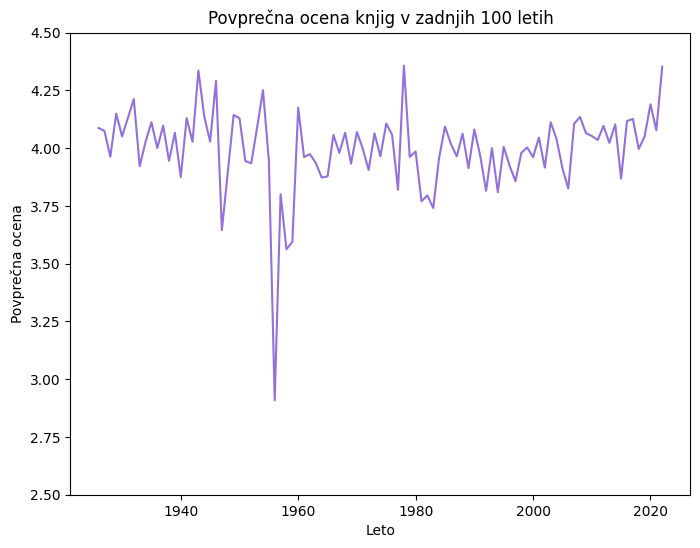

In [97]:
# Graf povprečnih ocen knjig v zadnjih 100 letih (knjig z več kot 10 ocenami)
novejse_knjige1_povp.plot(kind = "line", figsize = (8, 6), color = "mediumpurple")
plt.title("Povprečna ocena knjig v zadnjih 100 letih")
plt.xlabel("Leto")
plt.ylabel("Povprečna ocena")
plt.ylim(2.5, 4.5)
plt.show()

In [98]:
# Knjige z največ izdajami
knjige_izdaje = knjige.sort_values("stevilo_izdaj", ascending = False)
knjige_izdaje.head(10)

,naslov,avtor,ocena,stevilo_ocen,want_to_read,prva_izdaja,stevilo_izdaj,stoletje
279,Pride and Prejudice,Jane Austen,4.155280,322.0,0.0,1813.0,4036.0,19.0
170,Alice's Adventures in Wonderland,Lewis Carroll,4.020513,195.0,0.0,1865.0,3546.0,19.0
376,Current law statutes annotated.,Great Britain.,3.272727,11.0,196.0,1691.0,3456.0,17.0
191,The Holy Bible: containing the Old and New Tes...,Bible,3.927536,69.0,0.0,1200.0,3172.0,13.0
348,The Picture of Dorian Gray,Oscar Wilde,4.105769,104.0,0.0,1890.0,2986.0,19.0
203,Wuthering Heights,Emily Brontë,3.952586,232.0,0.0,1846.0,2850.0,19.0
456,Coloring Book: Dachshund Dog B 69 Pages - 8 X ...,Donald Nguyen,5.000000,1.0,80.0,2019.0,2735.0,21.0
252,A Christmas Carol,Charles Dickens,3.945652,92.0,584.0,1843.0,2727.0,19.0
280,Adventures of Huckleberry Finn,Mark Twain,3.816425,207.0,930.0,1876.0,2552.0,19.0
99,Emma,Jane Austen,3.980000,50.0,815.0,1815.0,2261.0,19.0


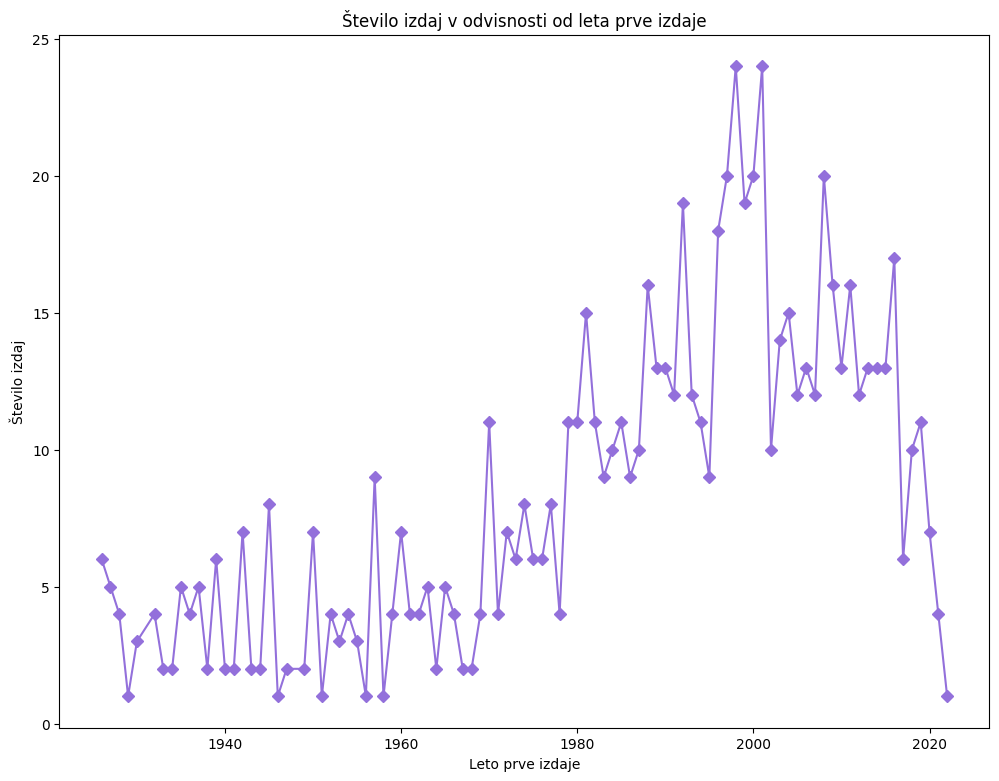

In [99]:
# Število izdaj v odvisnosti od leta izdaje
izdaje_na_leto = novejse_knjige1.groupby("prva_izdaja").size()

plt.figure(figsize=(12, 9))
izdaje_na_leto.plot(kind="line", marker = "D", color = "mediumpurple")
plt.title("Število izdaj v odvisnosti od leta prve izdaje")
plt.xlabel("Leto prve izdaje")
plt.ylabel("Število izdaj")
plt.show()

In [100]:
# Število ocen v odvisnosti od "Want to read"
povezava_st_ocen_wtr = knjige["stevilo_ocen"].corr(knjige["want_to_read"])
print("Povezava:", povezava_st_ocen_wtr) 
# knjige z več ocenami imajo tudi večji "want to read", ampak povezava mi zelo mocna,
# izjeme vseeno obstajajo

Povezava: 0.3200370657839728


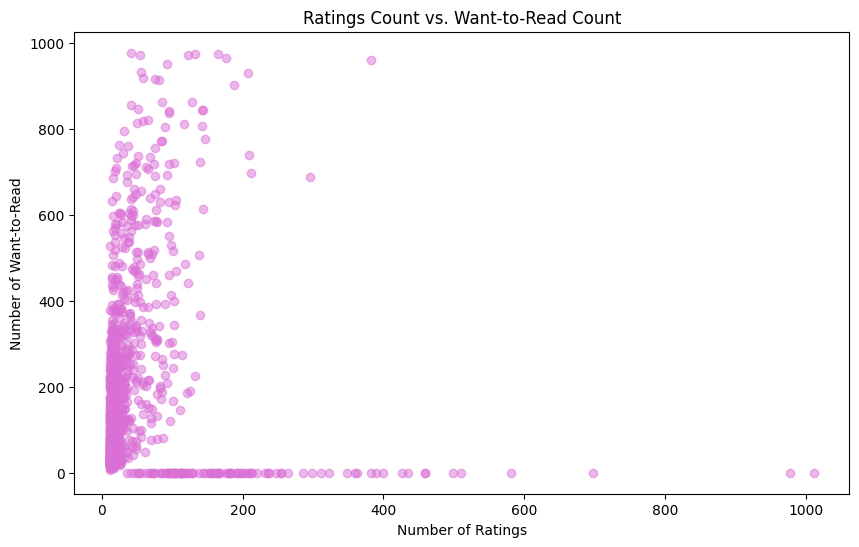

In [101]:

plt.figure(figsize=(10,6))
plt.scatter(knjige_10["stevilo_ocen"], knjige_10["want_to_read"], alpha=0.5, color = "orchid")

plt.title("Ratings Count vs. Want-to-Read Count")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Want-to-Read")
plt.show()


In [102]:
# Najpogostejše besede v naslovih knjig

[('book', 306), ('from', 200), ('life', 159), ('junie', 148), ('john', 144), ('novel', 142), ('history', 138), ('jones', 129), ('business', 127), ('william', 111), ('king', 100), ('english', 98), ('marketing', 93), ('world', 92), ('yeats', 90), ('james', 90), ('story', 84), ('first', 84), ('roman', 79), ('love', 76)]


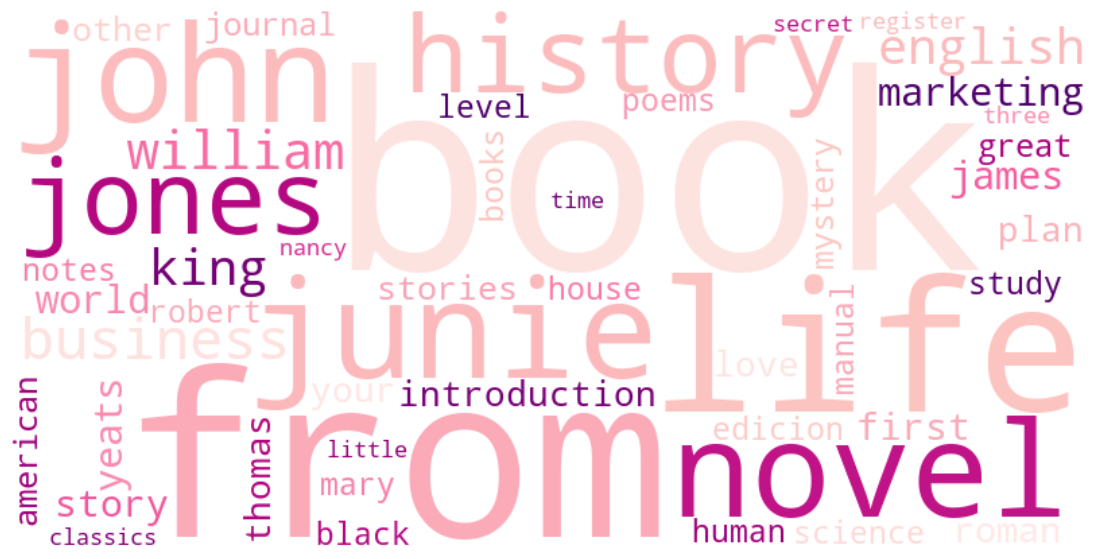

In [103]:
from collections import Counter
import re
from wordcloud import WordCloud

stop_besede = {"the", "and", "of", "in", "a", "an", "for", "to", "on", "with", "b2b", "volume", "part", "series", "edition", "laminated", "guide"}
vse_besede = []

for naslov in knjige["naslov"]:
    besede = re.findall(r"\b[a-zčšž]+\b", str(naslov).lower())
    besede = [beseda for beseda in besede if beseda not in stop_besede and len(beseda) > 3]
    vse_besede.extend(besede)

pojavitev_besed = Counter(vse_besede)
najbolj_pogoste_besede_v_naslovu = pojavitev_besed.most_common(20)
print(najbolj_pogoste_besede_v_naslovu)

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color= "white",
    colormap = "RdPu",
    max_words = 50
).generate_from_frequencies(pojavitev_besed)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

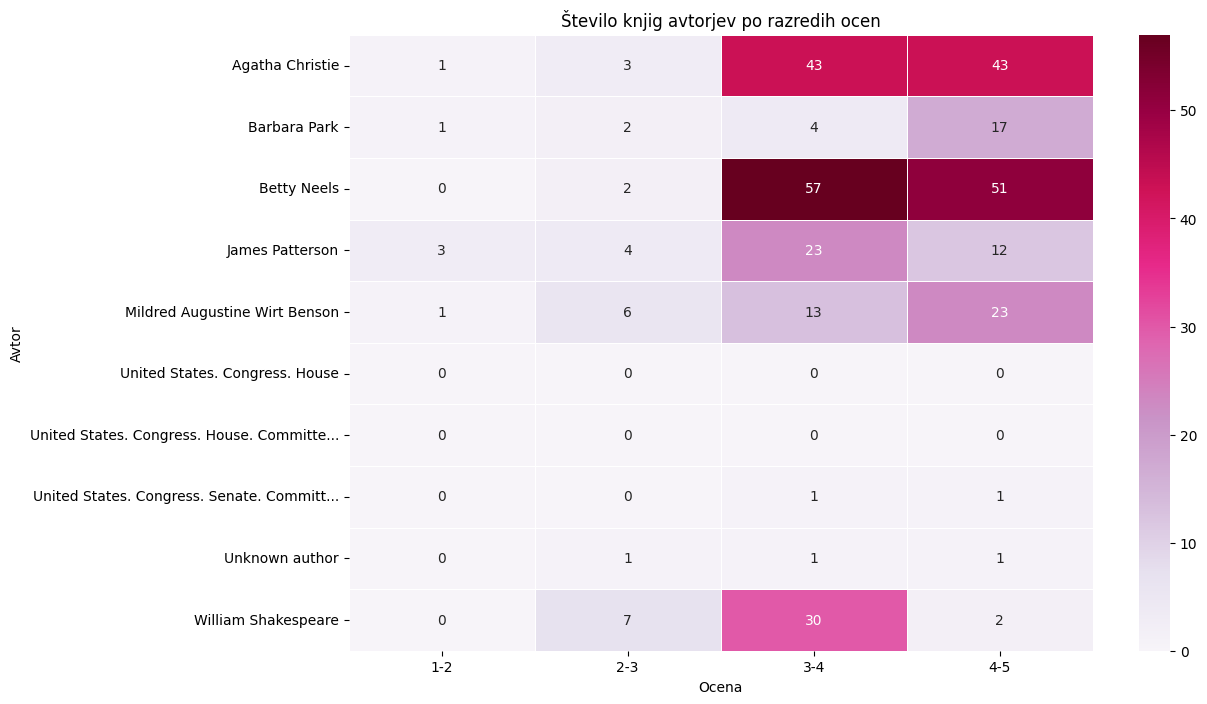

In [104]:
# Število knjig avtorjev v odvisnosti od povprečne ocene avtorjev
ocene = [1, 2, 3, 4, 5]
oznake = ["1-2", "2-3", "3-4", "4-5"]
top10_avtorjev = st_knjig_na_avtorja.head(10).index

knjige_top10 = knjige[knjige["avtor"].isin(top10_avtorjev)].copy()
knjige_top10["razredi_ocen"] = pd.cut(
    knjige_top10["ocena"],
    bins = ocene,
    labels=oznake,
    include_lowest=True)

ocene_knjig_avtorjev_count = knjige_top10.pivot_table(
    index = "avtor",
    columns="razredi_ocen",
    values ="naslov",
    aggfunc = "count",
    fill_value=0,
    observed=False
)

plt.figure(figsize=(12,8))
sns.heatmap(ocene_knjig_avtorjev_count, cmap="PuRd", linewidths=0.5, annot=True, fmt="d")
plt.title("Število knjig avtorjev po razredih ocen")
plt.xlabel("Ocena")
plt.ylabel("Avtor")
plt.show()


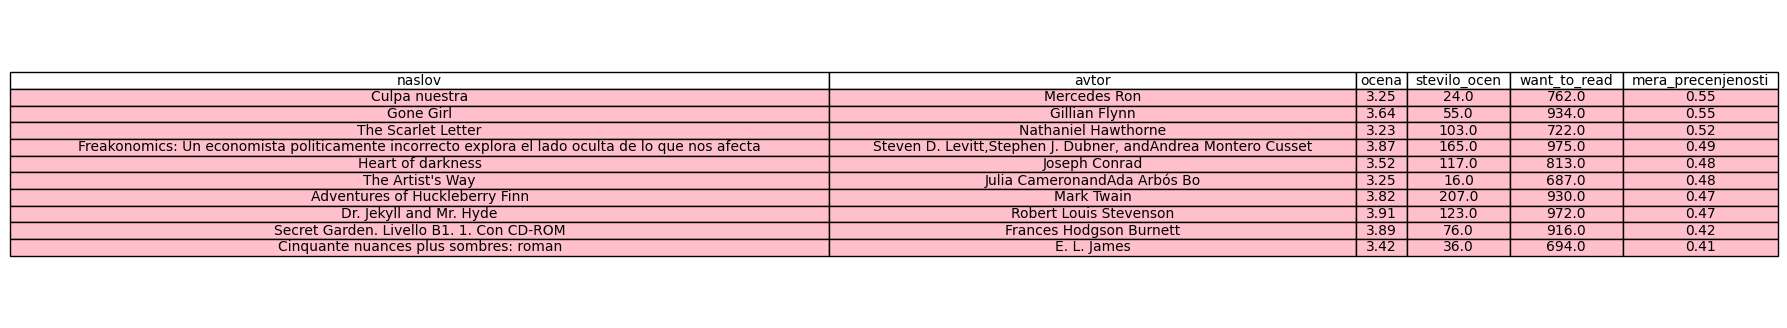

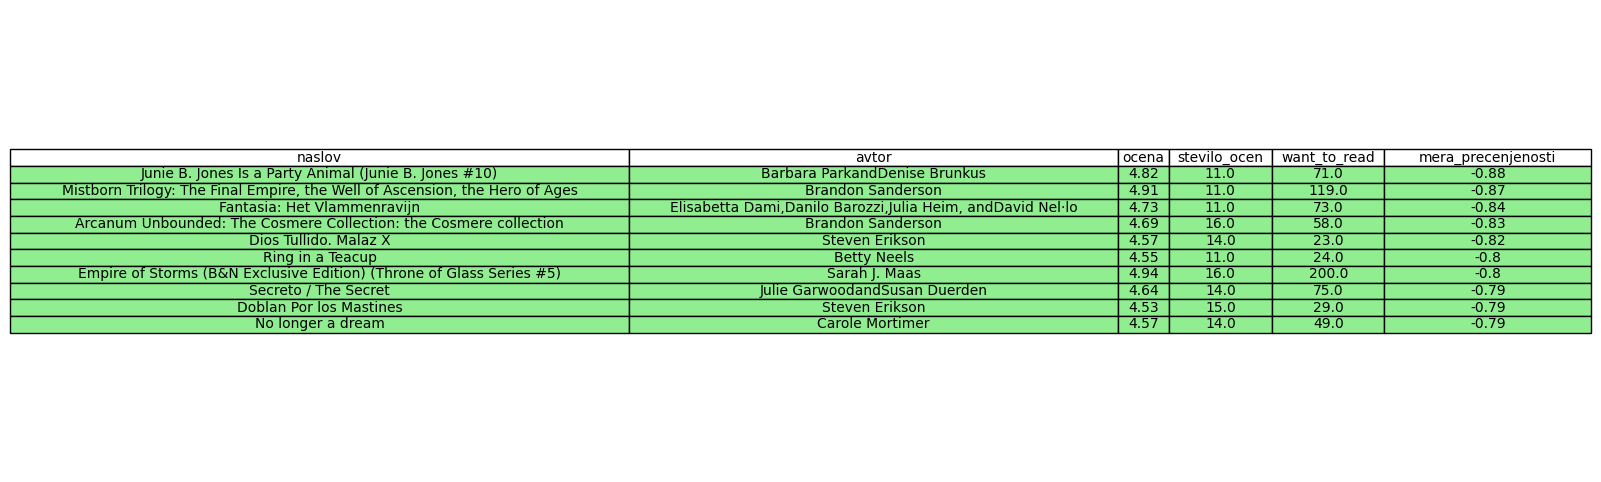

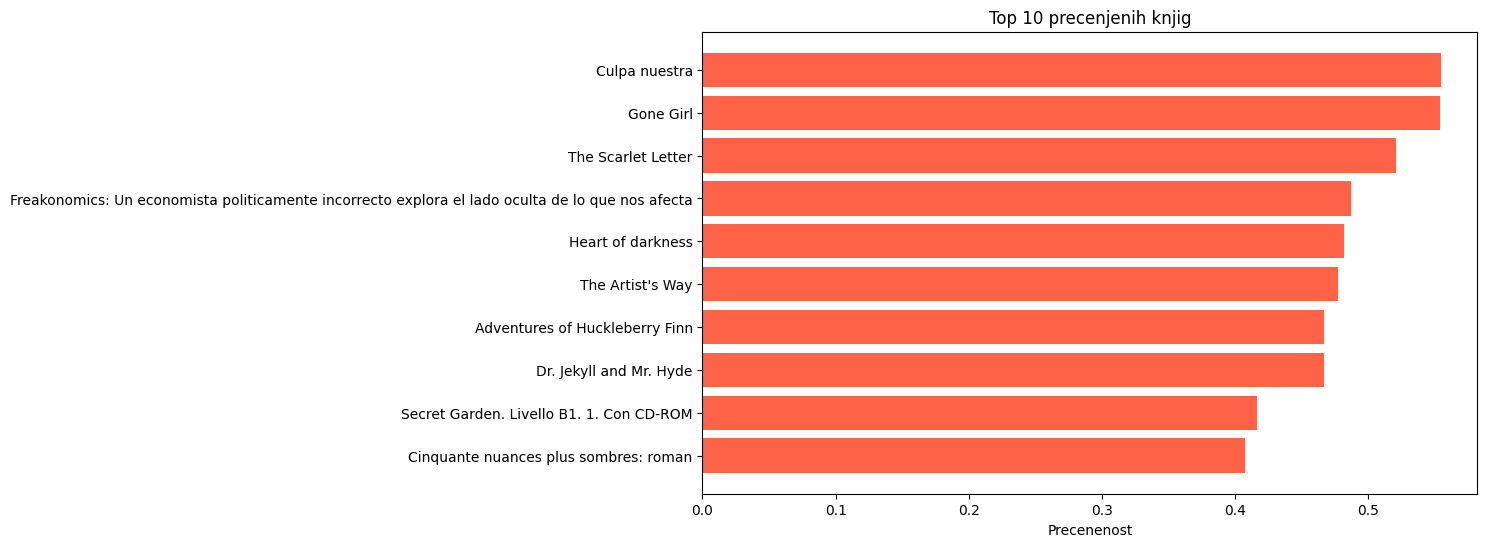

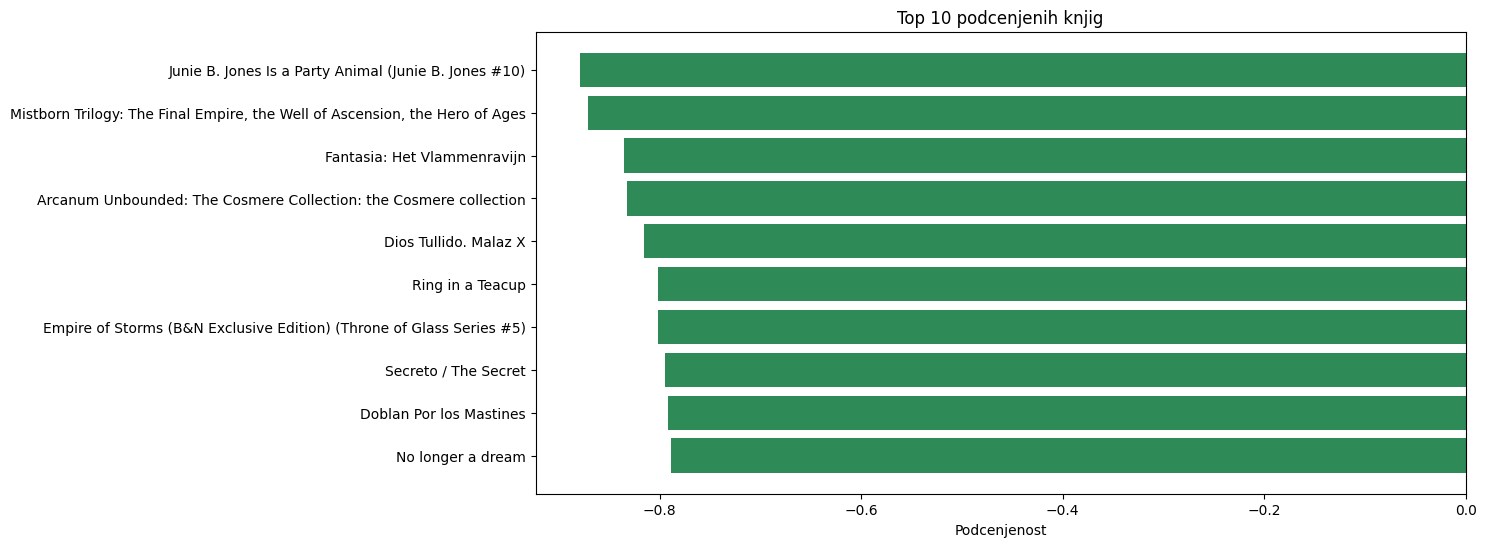

In [105]:
# Top 10 najbolj overrated knjig
# Keep only books with at least 1 want-to-read
knjige_nonzero_wtr = knjige_10[knjige_10["want_to_read"] > 0].copy()

povprecje_vseh = knjige_nonzero_wtr["ocena"].mean()


# Metrika za določanje knjig, ki so precenjene
# V izračunu so le knjige z dovolj visoko oceno, oziroma knjige z nizko oceno so ustrezno "kaznovane"
m = knjige_nonzero_wtr["stevilo_ocen"].quantile(0.75)  # meja za število ocen, ki jo ima zgornjih 75% knjig
p = povprecje_vseh

knjige_nonzero_wtr["prilagojena_ocena"] = (knjige_nonzero_wtr["ocena"] - knjige_nonzero_wtr["ocena"].min()) / \
                                          (knjige_nonzero_wtr["ocena"].max() - knjige_nonzero_wtr["ocena"].min())

knjige_nonzero_wtr["prilagojen_wtr"] = (knjige_nonzero_wtr["want_to_read"] - knjige_nonzero_wtr["want_to_read"].min()) / \
                                       (knjige_nonzero_wtr["want_to_read"].max() - knjige_nonzero_wtr["want_to_read"].min())


# Overrated score = difference between actual rating and weighted score (upoštevamo tudi want to read)
knjige_nonzero_wtr["mera_precenjenosti"] = knjige_nonzero_wtr["prilagojen_wtr"] - knjige_nonzero_wtr["prilagojena_ocena"]

# Top 10 most overrated
top_overrated = knjige_nonzero_wtr.sort_values("mera_precenjenosti", ascending=False).head(10)
top_overrated[["naslov", "avtor", "ocena", "stevilo_ocen", "mera_precenjenosti"]]


top_over = knjige_nonzero_wtr.sort_values("mera_precenjenosti", ascending=False).head(10)
top_under = knjige_nonzero_wtr.sort_values("mera_precenjenosti", ascending=True).head(10)
top_over

# Round numeric columns and rename for display
podatki_over = top_over[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "mera_precenjenosti"]].copy()
podatki_over["ocena"] = podatki_over["ocena"].round(2)
podatki_over["mera_precenjenosti"] = podatki_over["mera_precenjenosti"].round(2)

# Optionally rename columns for display
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis("off")
tabela_over = ax.table(
    cellText=podatki_over.values,
    colLabels=podatki_over.columns,
    cellLoc="center",
    loc="center",
    cellColours=[["pink"] * len(podatki_over.columns)] * len(podatki_over)
)
tabela_over.auto_set_font_size(False)
tabela_over.set_fontsize(10)
tabela_over.auto_set_column_width([0,1,2,3,4])
plt.show()

podatki_under = top_under[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "mera_precenjenosti"]].copy()
podatki_under["ocena"] = podatki_under["ocena"].round(2)
podatki_under["mera_precenjenosti"] = podatki_under["mera_precenjenosti"].round(2)

# Optionally rename columns for display
fig, ax = plt.subplots(figsize=(16, 6))
ax.axis("off")
tabela_under = ax.table(
    cellText=podatki_under.values,
    colLabels=podatki_under.columns,
    cellLoc="center",
    loc="center",
    cellColours=[["lightgreen"] * len(podatki_under.columns)] * len(podatki_under)
)
tabela_under.auto_set_font_size(False)
tabela_under.set_fontsize(10)
tabela_under.auto_set_column_width([0,1,2,3,4])
plt.show()


plt.figure(figsize=(10,6))
plt.barh(top_over["naslov"], top_over["mera_precenjenosti"], color="tomato")
plt.title("Top 10 precenjenih knjig")
plt.xlabel("Precenenost")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12,6))
plt.barh(top_under["naslov"], top_under["mera_precenjenosti"], color="seagreen")
plt.title("Top 10 podcenjenih knjig")
plt.xlabel("Podcenjenost")
plt.gca().invert_yaxis()
plt.show()

In [106]:
podatki_over

,naslov,avtor,ocena,stevilo_ocen,want_to_read,mera_precenjenosti
1862,Culpa nuestra,Mercedes Ron,3.25,24.0,762.0,0.55
852,Gone Girl,Gillian Flynn,3.64,55.0,934.0,0.55
248,The Scarlet Letter,Nathaniel Hawthorne,3.23,103.0,722.0,0.52
665,Freakonomics: Un economista politicamente inco...,"Steven D. Levitt,Stephen J. Dubner, andAndrea ...",3.87,165.0,975.0,0.49
283,Heart of darkness,Joseph Conrad,3.52,117.0,813.0,0.48
1200,The Artist's Way,Julia CameronandAda Arbós Bo,3.25,16.0,687.0,0.48
280,Adventures of Huckleberry Finn,Mark Twain,3.82,207.0,930.0,0.47
310,Dr. Jekyll and Mr. Hyde,Robert Louis Stevenson,3.91,123.0,972.0,0.47
102,Secret Garden. Livello B1. 1. Con CD-ROM,Frances Hodgson Burnett,3.89,76.0,916.0,0.42
485,Cinquante nuances plus sombres: roman,E. L. James,3.42,36.0,694.0,0.41


In [107]:
# Top 10 knjig najbolj vrednih branja
# knjige, ki imajo dovolj visoko oceno in hkrati dovolj veliko ocen, da so ocene "accurate"

import numpy as np

# Vzamemo log-weighted score
knjige_10["vredne_branja"] = knjige["ocena"] * np.log1p(knjige["stevilo_ocen"])
top10_vrednih_branja = knjige_10.sort_values("vredne_branja", ascending = False).head(10)

# Prikaz v tabeli
podatki_vredne = top10_vrednih_branja[["naslov", "avtor", "ocena", "stevilo_ocen", "want_to_read", "vredne_branja"]].copy()
podatki_vredne["ocena"] = podatki_vredne["ocena"].round(2)
podatki_vredne["vredne_branja"] = podatki_vredne["vredne_branja"].round(2)

podatki_vredne


,naslov,avtor,ocena,stevilo_ocen,want_to_read,vredne_branja
755,De 48 wetten van de macht,Robert Greene,4.04,1012.0,0.0,27.97
465,A Game of Thrones,George R. R. Martin,4.22,698.0,0.0,27.62
59,"Rich Dad, Poor Dad B Special",Robert T. KiyosakiandSharon L. Lechter,4.01,978.0,0.0,27.62
250,Harry Potter and the Prisoner of Azkaban,J. K. Rowling,4.28,581.0,0.0,27.22
236,The Hobbit,J.R.R. Tolkien,4.28,459.0,0.0,26.25
70,El juego de Ender,Orson Scott Card,4.35,382.0,960.0,25.89
266,Animal Farm,George Orwell,4.13,510.0,0.0,25.76
369,Harry Potter and the Chamber of Secrets,J. K. Rowling,4.20,435.0,0.0,25.55
331,Harry Potter und die Heiligtümer des Todes,J. K. Rowling,4.28,389.0,0.0,25.51
118,The Hunger Games,Suzanne Collins,4.10,459.0,0.0,25.15


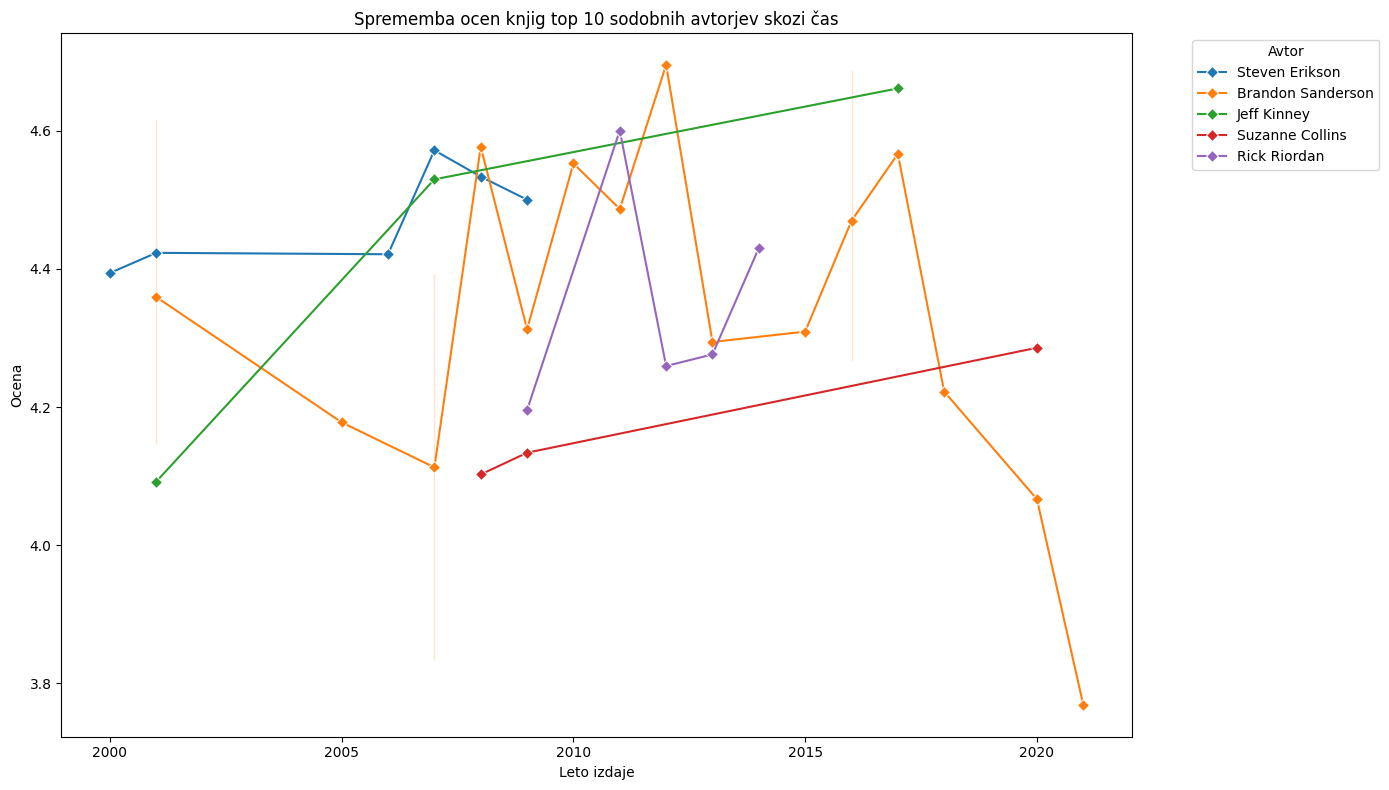

In [108]:
# Distribucija ocen knjig top 10 najbolje ocenjenih avtorjev
knjige_novejse = knjige_10[knjige_10["prva_izdaja"] >= 2000].copy()

#izberemo avtorje z vsaj tremi knjigami
st_knjig_avtorja = knjige_novejse["avtor"].value_counts()
veljavni_avtorji = st_knjig_avtorja[st_knjig_avtorja >= 3].index
knjige_novejse = knjige_novejse[knjige_novejse["avtor"].isin(veljavni_avtorji)]

# izberemo top 10 avtorjev, ki ustrezajo prejšnjim kriterijem
povprecje_avtorjev = knjige_novejse.groupby("avtor")["ocena"].mean()
top10_sodobnih_avtorjev = povprecje_avtorjev.sort_values(ascending = False).head(5).index
knjige_top10_avtorjev = knjige_novejse[knjige_novejse["avtor"].isin(top10_sodobnih_avtorjev)]
# Knjige razvrstimo po letu izdaje
knjige_top10_avtorjev = knjige_top10_avtorjev.sort_values(by = "prva_izdaja")

plt.figure(figsize=(14, 8))
sns.lineplot(data=knjige_top10_avtorjev, x = "prva_izdaja", y = "ocena", hue = "avtor", marker = "D")
plt.title("Sprememba ocen knjig top 10 sodobnih avtorjev skozi čas")
plt.xlabel("Leto izdaje")
plt.ylabel("Ocena")
plt.legend(title = "Avtor", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()

In [109]:
# funkcija, ki za danega avtorja nariše zgornji graf 
# najbolj overrated avtorji


In [111]:
# Leto izdaje in ocena knjig avtorjev z več kot tremi ocenami
import ipywidgets as widgets
from ipywidgets import interact

# Top 50 avtorjev po številu knjig z več kot 3 ocenami:
knjige_3 = knjige[knjige["stevilo_ocen"] > 3]
st_knjig_na_avtorja = knjige_3["avtor"].value_counts()
top50_avtorjev = st_knjig_na_avtorja.head(50).index.tolist()

def graf_za_avtorja(avtor):
    podatki = knjige_3[knjige_3["avtor"] == avtor].sort_values("prva_izdaja")

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=podatki, x = "prva_izdaja", y = "ocena", marker = "D")
    plt.title(f"Ocene skozi čas avtorja {avtor}")
    plt.xlabel("Leto izdaje")
    plt.ylabel("Ocena")
    plt.ylim(1, 5)
    plt.show()

interact(graf_za_avtorja, avtor=widgets.Dropdown(options=top50_avtorjev, description="Avtor:"))


interactive(children=(Dropdown(description='Avtor:', options=('Betty Neels', 'Agatha Christie', 'William Shake…

<function __main__.graf_za_avtorja(avtor)>

In [113]:
# Najbolj overrated avtorji in najbolj underrated avtorji
avtorji_metrika = knjige_nonzero_wtr.groupby("avtor")["mera_precenjenosti"].mean().reset_index()
top10_overrated_avtorjev = avtorji_metrika.sort_values("mera_precenjenosti", ascending = False).head(10)
top10_underrated_avtorjev = avtorji_metrika.sort_values("mera_precenjenosti", ascending = True).head(10)

top10_overrated_avtorjev["mera_precenjenosti"] = top10_overrated_avtorjev["mera_precenjenosti"].round(2)
top10_underrated_avtorjev["mera_precenjenosti"] = top10_underrated_avtorjev["mera_precenjenosti"].round(2)





In [114]:
top10_overrated_avtorjev

,avtor,mera_precenjenosti
194,Gillian Flynn,0.55
471,"Steven D. Levitt,Stephen J. Dubner, andAndrea ...",0.49
293,Julia CameronandAda Arbós Bo,0.48
168,Frances Hodgson Burnett,0.42
355,Mercedes Ron,0.41
436,Rupi Kaur,0.40
423,Robert B. Cialdini,0.39
138,E. L. James,0.34
287,Joseph Heller,0.31
470,Stephenie MeyerandStephenie Meyer,0.30


In [115]:
top10_underrated_avtorjev

,avtor,mera_precenjenosti
47,Barbara ParkandDenise Brunkus,-0.88
149,"Elisabetta Dami,Danilo Barozzi,Julia Heim, and...",-0.84
445,Sarah J. Maas,-0.80
295,Julie GarwoodandSusan Duerden,-0.79
139,Eddie Jaku,-0.74
370,Mo Willems,-0.72
181,Garth Nix,-0.72
372,N. K. Jemisin,-0.72
483,"Terry Pratchett,Ian Stewart,Jack Cohen,Ian Ste...",-0.72
413,Raymond E. FeistandPeter Joyce,-0.71


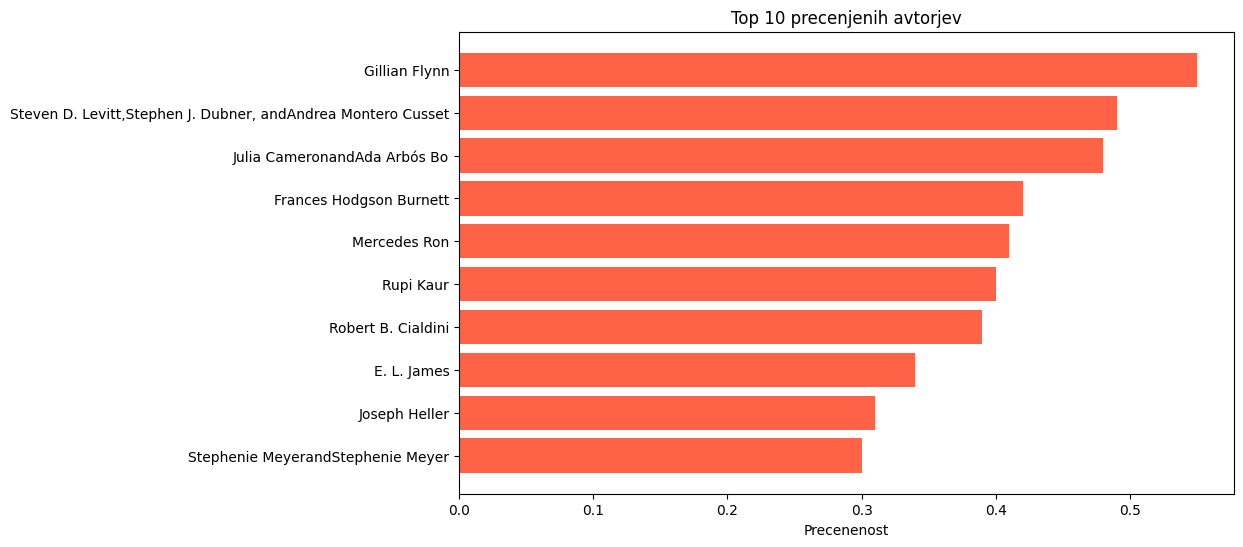

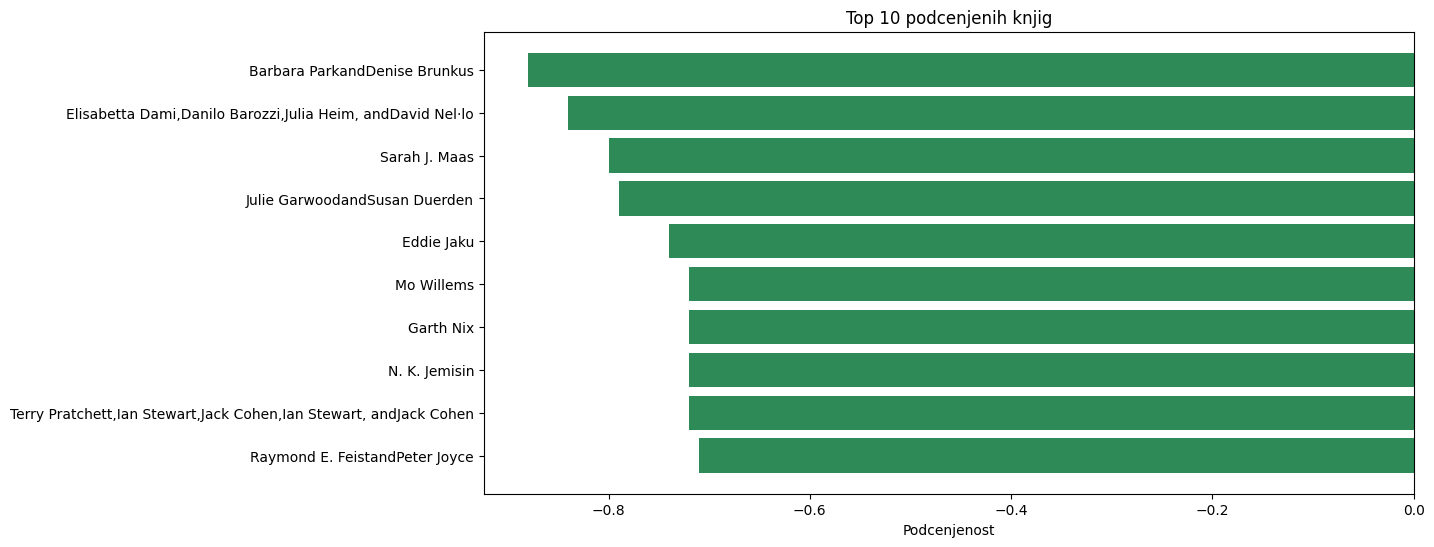

In [116]:
plt.figure(figsize=(10,6))
plt.barh(top10_overrated_avtorjev["avtor"], top10_overrated_avtorjev["mera_precenjenosti"], color="tomato")
plt.title("Top 10 precenjenih avtorjev")
plt.xlabel("Precenenost")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12,6))
plt.barh(top10_underrated_avtorjev["avtor"], top10_underrated_avtorjev["mera_precenjenosti"], color="seagreen")
plt.title("Top 10 podcenjenih knjig")
plt.xlabel("Podcenjenost")
plt.gca().invert_yaxis()
plt.show()